In [77]:
import fastf1 as f1
import fastf1.plotting as f1plt
from matplotlib import pyplot as plt

In [78]:
f1.set_log_level("Warning")
session = f1.get_session(2023, 'Mexico', 'Q')

session.load()

f1.plotting.setup_mpl(misc_mpl_mods=False)

In [167]:
def get_tick_label(a, max, min):
    if a.get_text()[0] != '−':
        return int(a.get_text())
    else:
        return 0

C:\Users\kevin.sweitzer\AppData\Local\Temp\ipykernel_33588\2814259101.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  drs.set_xticklabels(drs.get_xticklabels(), fontsize = 20)


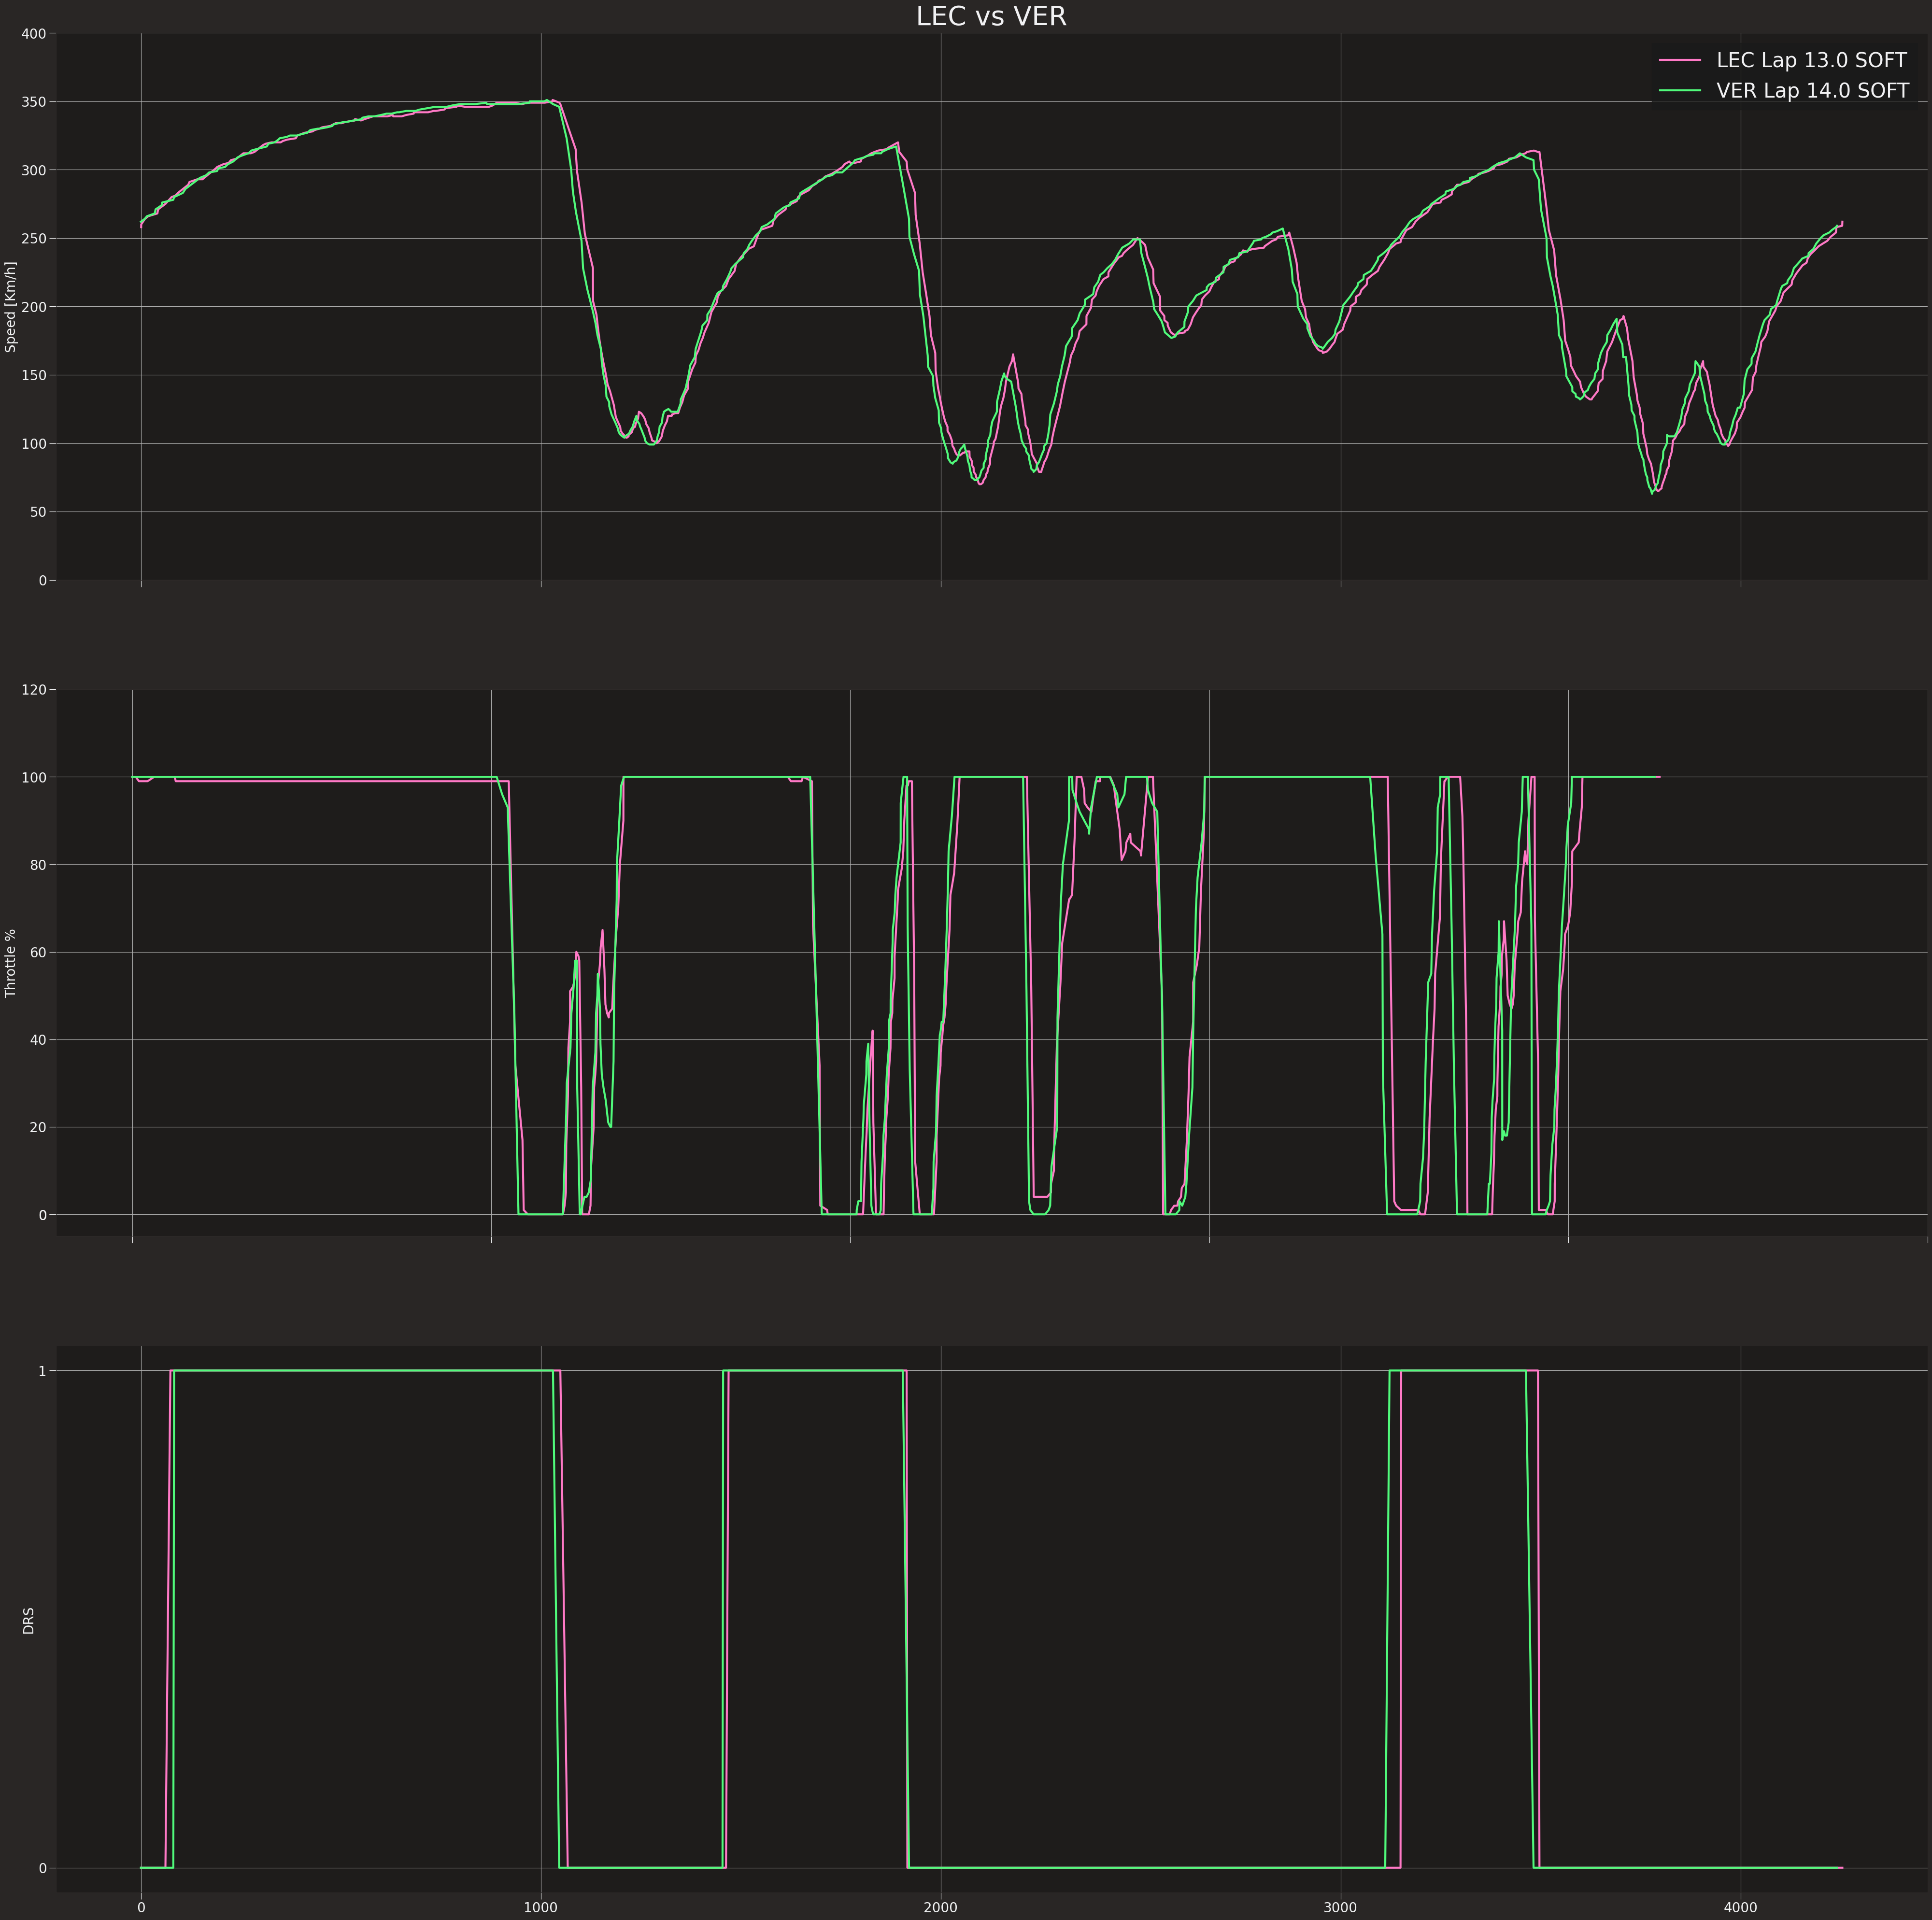

In [169]:
#def telemetry_graph(session, laps):

drivers = ['LEC', 'VER']

laps = []
for driver in drivers:
    laps.append(session.laps.pick_driver(driver).pick_fastest())

fig, (tel, thr, drs) = plt.subplots(3)
fig.set_figwidth(50)
fig.set_figheight(50)

tel_max = 0
tel_min = 0
for lap in laps:
    tel_data = lap.get_telemetry()
    tel_max = tel_data['Speed'].max()
    drs_data = []
    for drs_status in tel_data['DRS']:
        drs_data.append(1 if drs_status > 9 else 0)

    tel.plot(tel_data['Distance'], tel_data['Speed'], linewidth = 3.0, label=lap['Driver'] + " Lap " + str(lap['LapNumber']) + " " + str(lap['Compound']))
    thr.plot(tel_data['Distance'], tel_data['Throttle'], linewidth = 3.0,  label=lap['Driver'] + " Lap " + str(lap['LapNumber']) + " " + str(lap['Compound']))
    drs.plot(tel_data['Distance'], drs_data, linewidth = 3.0,  label=lap['Driver'] + " Lap " + str(lap['LapNumber']) + " " + str(lap['Compound']))


tel.set_title(drivers[0] + " vs " + drivers[1], fontsize = 40)
tel.set_ylabel('Speed [Km/h]', fontsize = 20)
tel.set_xticklabels([])
tel.set_yticks([get_tick_label(x, tel_max, tel_min) for x in tel.get_yticklabels()])
tel.set_yticklabels(tel.get_yticklabels(), fontsize = 20)
tel.tick_params('both', length=10.0)
tel.legend(fontsize = 30)
tel.grid()

thr.set_ylabel('Throttle %', fontsize = 20)
thr.set_xticklabels([])
thr.set_yticks([get_tick_label(x) for x in thr.get_yticklabels()])
thr.set_yticklabels(thr.get_yticklabels(), fontsize = 20)
thr.tick_params('both', length=10.0)
thr.grid()

drs.set_ylabel('DRS', fontsize = 20)
thr.set_xticks([get_tick_label(x) for x in drs.get_xticklabels()])
drs.set_xticklabels(drs.get_xticklabels(), fontsize = 20)
drs.set_yticks([0,1])
drs.set_yticklabels([0,1], fontsize = 20)
drs.tick_params('both', length=10.0)
drs.grid()


plt.show()

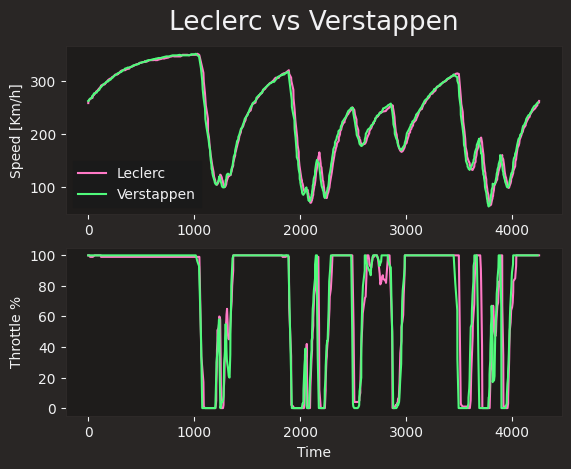

In [80]:
fast_leclerc = session.laps.pick_driver('LEC').pick_fastest()
max = session.laps.pick_driver('VER').pick_fastest()

lec_car_data = fast_leclerc.get_telemetry()
dl = lec_car_data['Distance']
vCar = lec_car_data['Speed']
lThrottle = lec_car_data['Throttle']

max_car_data = max.get_telemetry()
dm = max_car_data['Distance']
mCar = max_car_data['Speed']
mThrorrle = max_car_data['Throttle']

# The rest is just plotting
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(dl, vCar, label='Leclerc')
ax1.plot(dm, mCar, label='Verstappen')
ax1.set_ylabel('Speed [Km/h]')
ax1.set_title('Leclerc vs Verstappen')
ax1.legend()

ax2.plot(dl, lThrottle, label='Leclerc')
ax2.plot(dm, mThrorrle, label='Verstappen')
ax2.set_xlabel('Time')
ax2.set_ylabel('Throttle %')


plt.show()

In [108]:
fast_leclerc

Time                      0 days 01:06:44.966000
Driver                                       LEC
DriverNumber                                  16
LapTime                   0 days 00:01:17.166000
LapNumber                                   13.0
Stint                                        5.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:27.291000
Sector2Time               0 days 00:00:29.853000
Sector3Time               0 days 00:00:20.022000
Sector1SessionTime        0 days 01:05:55.091000
Sector2SessionTime        0 days 01:06:24.944000
Sector3SessionTime        0 days 01:06:44.966000
SpeedI1                                    317.0
SpeedI2                                    297.0
SpeedFL                                    254.0
SpeedST                                    348.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife            

In [133]:
idk = thr.get_yticklabels()

idk[0].get_text()

type(idk)

list

In [141]:
stuff = lambda a : a.get_text()

stuff(idk[0])[0]

'−'